<a href="https://colab.research.google.com/github/AKHIL-882/Python-Program-of-DU/blob/master/Innomatics_Research_Lab_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling the data** 

### **What Is Exploratory Data Analysis ?** 

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visual!)y. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights 

### **How to perform Exploratory Data Analysis ?**

Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA whereas in this notebook you can understand some common methods and plots that would be used In the EDA process. 


**Resource: Google**

### **Importiing the Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline


For more info on how to load dataset into colab. Check this [3 ways to load data into colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (3).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']))

**Printing the first 10 rows of the dataset**

In [ ]:
dataset.head(10)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


**Printing the last 10 rows of the dataset**

In [ ]:
dataset.tail(10)

,x1,x2,y
2217,102.043673,1.056439e+02,0
2218,104.492501,9.008542e+01,0
2219,96.633331,9.100000e+01,0
2220,76.924198,9.111424e+01,0
2221,88.129639,1.075149e+02,0
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


### **1 Checking the types of data and basic summary stats**

**1.1 Displaying datatype of each column and also display the non-null row**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


**1.2 Display the Summary stats which include count, mean, std, min, max etc**

In [ ]:
dataset.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


**1.3 Displaying null values in each column**

In [ ]:
dataset.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

**Observation** : There are no null values

### **2. Dropping Irrelevant Columns**

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful.


**2.1 Finding the correlation between x1 column and x2 column**

In [ ]:
x1_col = dataset['x1']
x2_col = dataset['x2']
correlation = x1_col.corr(x2_col)
correlation

0.037288320416439036

**2.2 Finding Correlation by Pearson methon**

In [ ]:
corr = dataset.corr(method = 'pearson')
corr

,x1,x2,y
x1,1.000000,0.037288,-0.121299
x2,0.037288,1.000000,-0.026724
y,-0.121299,-0.026724,1.000000


### **3. Dropping the duplicate rows**

This is often a handy thing to do because a huge dataset as in this case contains 2227 rows often have some duplicate data,so here we remove all the duplicate value from the dataset

In [ ]:
dataset.shape

(2227, 3)

**3.1 Finding duplicate rows**

In [ ]:
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("Number of duplicate rows", duplicate_rows_dataset)

Number of duplicate rows               x1     x2  y
4    -119.366669  115.0  1
477  -118.366669  107.0  1
484  -118.366669  107.0  1
490  -118.366669  132.0  1
707   129.633331 -122.0  1
775   -50.366669   46.0  1
981    85.633331 -126.0  1
1356   34.633331   17.0  0
1380   30.633331    9.0  0
1479 -117.366669 -124.0  0
1633  -51.366669  -84.0  0
1685 -114.366669 -121.0  0
1918   97.633331  103.0  0
2175   39.633331   30.0  0
2179   49.633331   42.0  0
2223   96.633331   91.0  0


**Observation** : There are no duplicate values

### **4. Dropping the missing or null values**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs.

In [ ]:
print(dataset.isnull().sum)

<bound method DataFrame.sum of          x1     x2      y
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
...     ...    ...    ...
2222  False  False  False
2223  False  False  False
2224  False  False  False
2225  False  False  False
2226  False  False  False

[2227 rows x 3 columns]>


In [ ]:
dataset = dataset.dropna()
dataset.count()

x1    2219
x2    2219
y     2219
dtype: int64

 **Observation**: There are no Null values to remove from the dataset

### **5 . EDA**

**5.1 Number of unique in each Column**

In [ ]:
dataset.nunique()

x1    1884
x2    1879
y        2
dtype: int64

In [ ]:
l = ['x1','x2','y']
for col in l:
    print("***"*40)
    print(col)
    print(dataset[col].value_counts())
    print("***"* 40)
    print("\n")


************************************************************************************************************************
x1
-118.366669    8
 31.633331     6
-80.366669     5
 103.633331    5
 30.633331     5
              ..
-19.907256     1
 58.434396     1
 18.408090     1
-99.593049     1
 54.003740     1
Name: x1, Length: 1884, dtype: int64
************************************************************************************************************************


************************************************************************************************************************
x2
-55.000000     7
-113.000000    7
 47.000000     6
-121.000000    6
 126.000000    6
              ..
-114.715946    1
-80.804223     1
 49.639026     1
 46.993822     1
-14.035979     1
Name: x2, Length: 1879, dtype: int64
************************************************************************************************************************


**********************************************************

**5.2 Visualizing the Categorical Attributes**

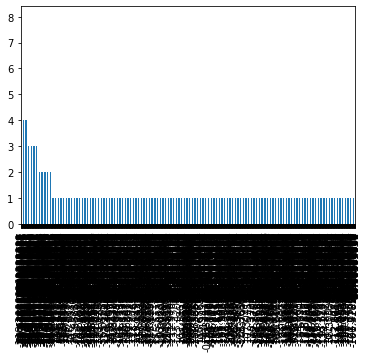

In [ ]:
dataset['x1'].value_counts().plot(kind = 'bar')

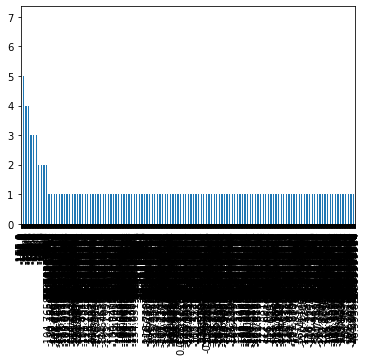

In [ ]:
dataset['x2'].value_counts().plot(kind = 'bar')

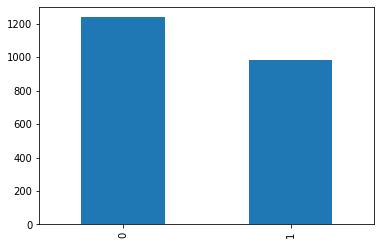

In [ ]:
dataset['y'].value_counts().plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


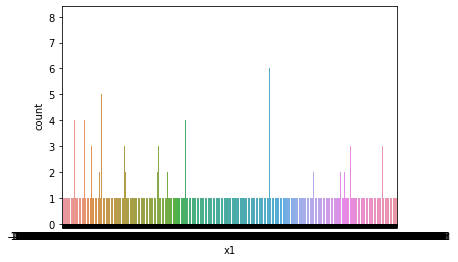

In [ ]:
sns.countplot(dataset['x1'])

##### **5.6 Value Count of All Categorial Columns**

In [ ]:
dataset.x1.value_counts()

-118.366669    8
 31.633331     6
-80.366669     5
 103.633331    5
 30.633331     5
              ..
-19.907256     1
 58.434396     1
 18.408090     1
-99.593049     1
 54.003740     1
Name: x1, Length: 1884, dtype: int64

In [ ]:
dataset.x2.value_counts()

-55.000000     7
-113.000000    7
 47.000000     6
-121.000000    6
 126.000000    6
              ..
-114.715946    1
-80.804223     1
 49.639026     1
 46.993822     1
-14.035979     1
Name: x2, Length: 1879, dtype: int64

In [ ]:
dataset['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

**5.7 Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


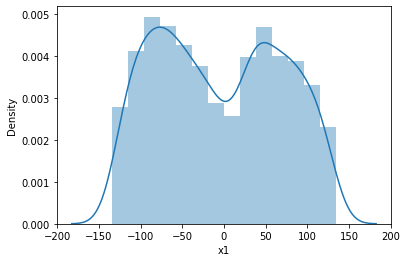

In [ ]:
 #univatiate Analysis on x1
 sns.distplot(dataset.x1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


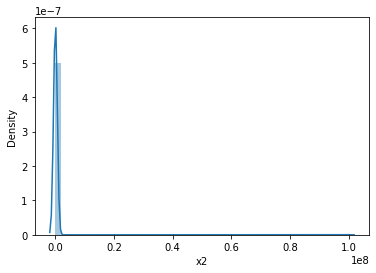

In [ ]:
#univatiate Analysis on x2
sns.distplot(dataset.x2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


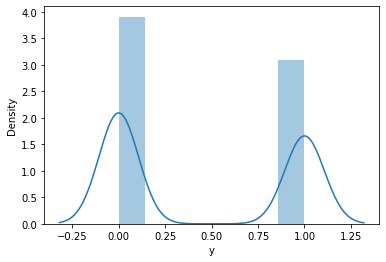

In [ ]:
#univatiate Analysis on y
sns.distplot(dataset.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


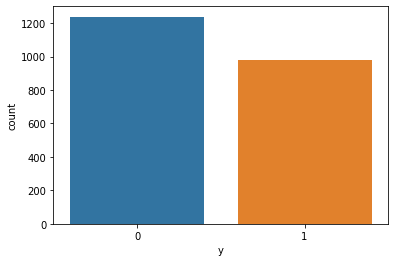

In [ ]:
#Countplot on y
sns.countplot(dataset.y)

**5.8 Mutivariate Analysis**

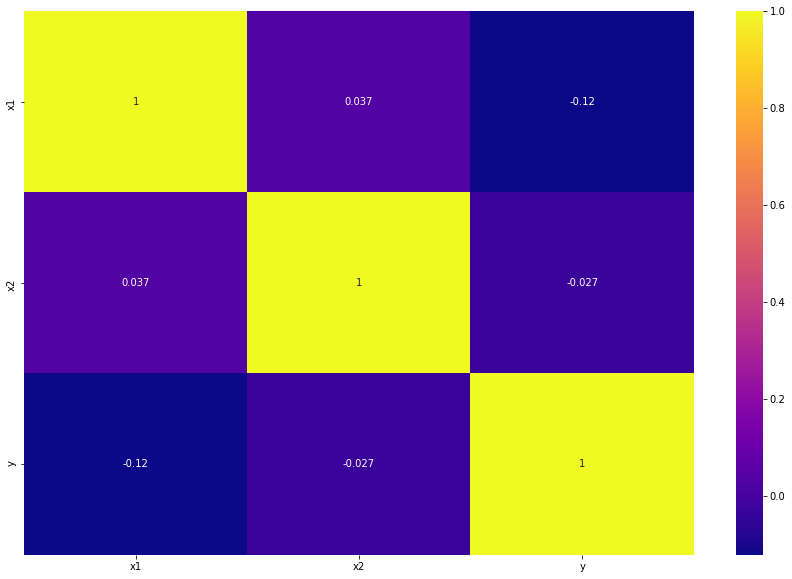

In [ ]:

#finding correlation using Heatmap
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True)

### **6. Scatterplot**

We generally use scatterplot to find the correlation between two variables. Here the scatter plots are plotted between x1 and x2 and we can see the plot below. With the plot given below, we can easily draw a trend line

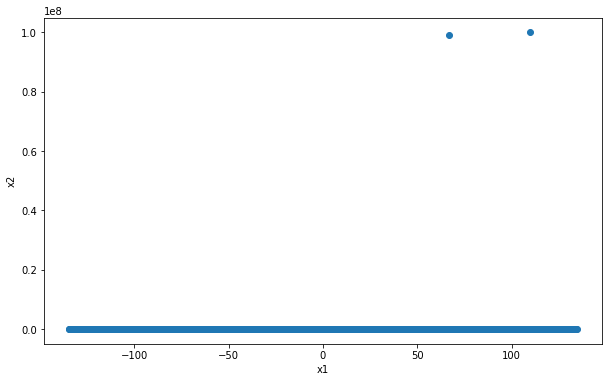

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(dataset['x1'],dataset['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

### **7. Transformations of feature variables**

**7.1 Collecting data into x and y variables**

In [ ]:
x = dataset[['x1','x2']]
y = dataset['y'].values


NameError: ignored

**7.2 We have to scale Income and CCAvg**

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['x1'].values.reshape(-1,1))
sns.distplot(pt.transform(x['x1'].values.reshape(-1,1)))


In [ ]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['x2'].values.reshape(-1,1))
sns.distplot(pt.transform(x['x2'].values.reshape(-1,1)))

**Observation** : Both **CCAvg** and **Income** are transformed. We also have to transform the mortgage column as it as more 0 values.

In [ ]:
x.head()

### **8.1. Building the Machine Learning Model - Logistic Regression**

**Logistic regression** is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1


**Resource: Google**

**8.1.1 Importing the StandardScaler and Train_test_split**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)


array([[ 0.27648847, -0.03590292],
       [-0.85526951, -0.03589167],
       [-0.40701977, -0.03591857],
       ...,
       [-0.75043981, -0.03589734],
       [-0.63224917, -0.03593569],
       [ 0.99912943, -0.03592993]])

**Observation** : Here we are standardizing the data and splited the data in the ratio 70:30 for training and testing

**8.1.2 Importing Logistic Regression from Linear Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**8.1.3 Fitting the data into the model**

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**8.1.4 Calculating the Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error : 0.4069069069069069
R2 score: -0.650263331138907


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.5930930930930931


In [ ]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.5692208628461043


**8.1.5 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[342  30]
 [241  53]]


**8.1.6 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72       372
           1       0.64      0.18      0.28       294

    accuracy                           0.59       666
   macro avg       0.61      0.55      0.50       666
weighted avg       0.61      0.59      0.52       666



------------------------------------------------------------------------------------------------------------------------
----------------------------------------

**Conclusion from Logistic Regression**
Accuracy score for the test data is 59%. But in confusion matrix , the false negative are very much that is above 241 .    

------------------------------------------------------------------------------------------------------------------------
----------------------------------------

### **8.2. Building the Machine Learning Model - Decision Tree**


**Decision tree** is one of the predictive modelling approaches used in statistics , data mining and machine learning . ... Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions.


**Resource: Google**

**8.2.1 Importing the Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)


**8.2.2 Visualizing the Decision Tree**

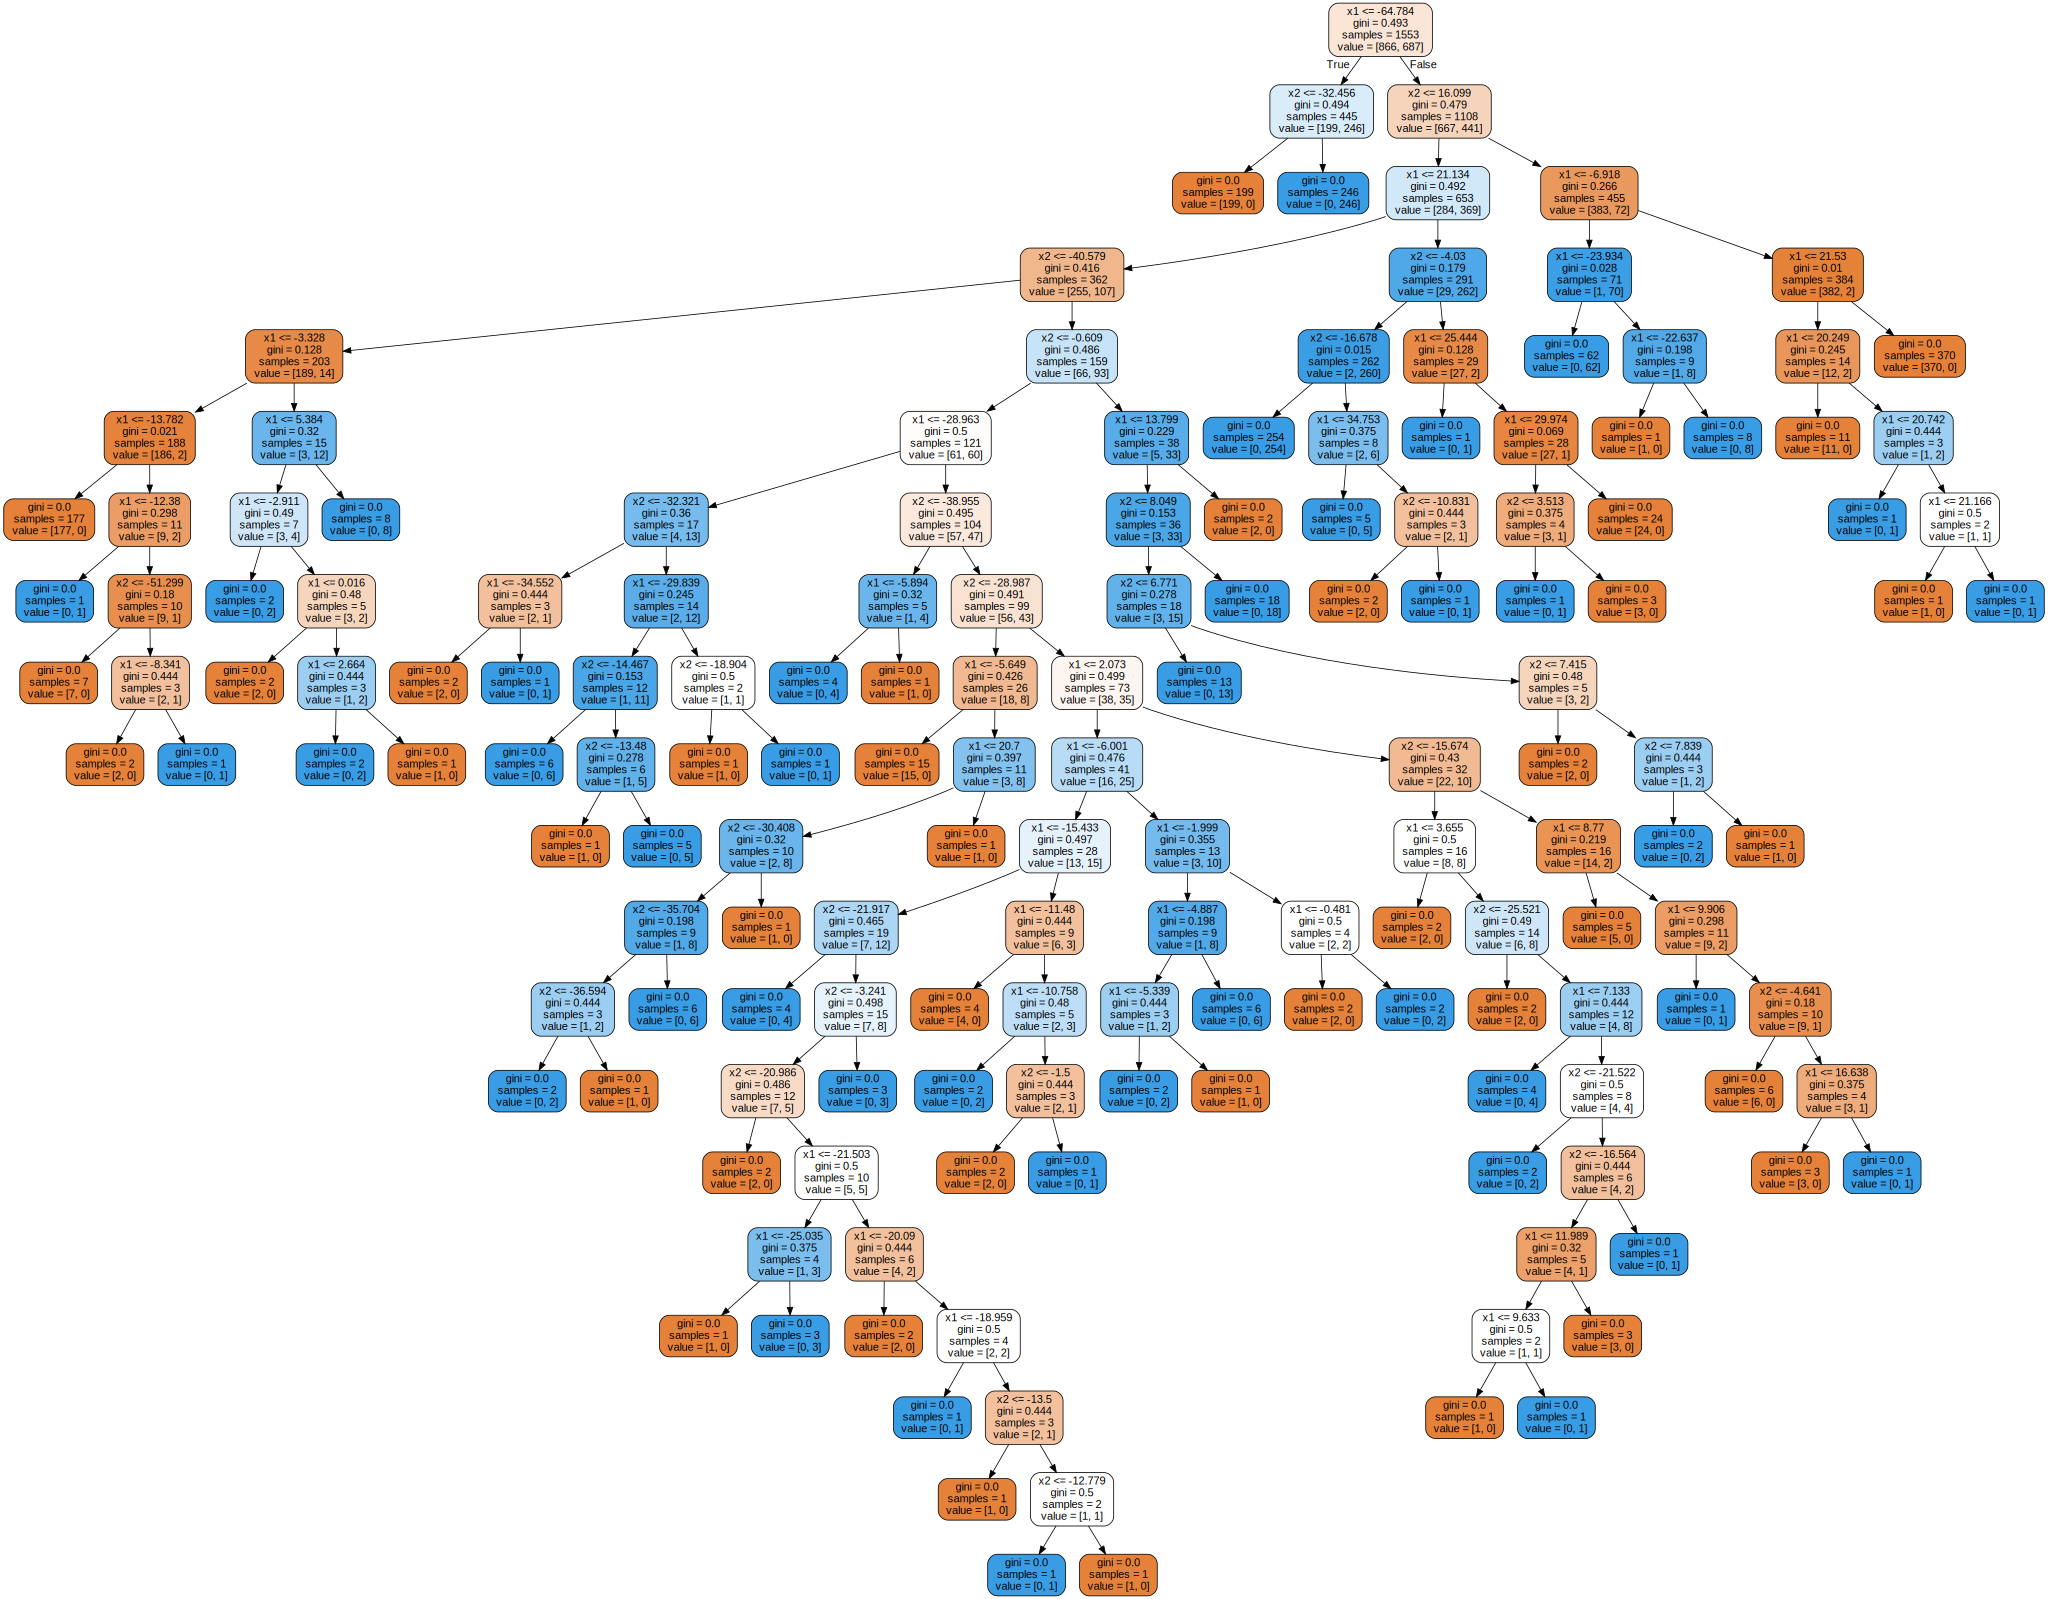

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['x1','x2'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

**8.2.3 Calculating the Prediction**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Meam Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score: - Test ",metrics.accuracy_score(y_test,y_pred))


Meam Absolute Error: 0.06306306306306306
R2 score: 0.7442396313364055
Accuracy score: - Test  0.9369369369369369


In [ ]:
print("Accuracy score: - Train ",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score: - Train  0.5692208628461043


**8.2.4 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[349  23]
 [ 19 275]]


**8.2.5 Printing the Classification Report**

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       372
           1       0.92      0.94      0.93       294

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: It is working very much better than other Logistic Regression. It is showing 95% accuracy score.In confusion matrix the false negatives are very less as compared to Logistic Regression.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

### **8.6. Building the Machine Learning Model - KNN**`

**K-Nearest Neighbors (KNN)** is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors

**8.6.1 Importing the KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**8.6.2 Calculating the Prediction**

In [ ]:
y_pred = neigh.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.05555555555555555
R2 score: 0.7746872942725478
Accuracy score - Test data 0.9444444444444444


In [ ]:
print("Accuracy score - Train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train data 0.5692208628461043


**8.6.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[348  24]
 [ 13 281]]


**8.6.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       372
           1       0.92      0.96      0.94       294

    accuracy                           0.94       666
   macro avg       0.94      0.95      0.94       666
weighted avg       0.95      0.94      0.94       666



------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: We can find that the model is working better when compared with Logistic and Decision trees accuracy score is 96%.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### **8.4. Building the Machine Learning Model - SVM with Linear Kernal**`

**Support Vector Machine** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well .


**Resource: Google**

**8.4.1 Importing the SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf = clf.fit(x_train,y_train)

**8.4.2 Calculating the Prediction**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test",metrics.accuracy_score(y_test,y_pred))


Mean Absolute Error: 0.44144144144144143
R2 score: -0.7903225806451613
Accuracy score - Test 0.5585585585585585


In [ ]:
print("Accuracy score - Train",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train 0.5692208628461043


**8.4.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[372   0]
 [294   0]]


**8.4.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       372
           1       0.00      0.00      0.00       294

    accuracy                           0.56       666
   macro avg       0.28      0.50      0.36       666
weighted avg       0.31      0.56      0.40       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: We can see that the accuracy score using svm with linear kernel is 56%. It was 94% in KNN. So KNN is working good rather than svm.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### **8.4. Building the Machine Learning Model - SVM with RBF Kernal**`


**Support Vector Machine** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well 


**Resource: Google**

**8.4.1 Importing the SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf = clf.fit(x_train,y_train)

**8.4.2 Calculating the Prediction**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test",metrics.accuracy_score(y_test,y_pred))


Mean Absolute Error: 0.44144144144144143
R2 score: -0.7903225806451613
Accuracy score - Test 0.5585585585585585


In [ ]:
print("Accuracy score - Train",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train 0.5692208628461043


**8.4.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[372   0]
 [294   0]]


**8.4.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       372
           1       0.00      0.00      0.00       294

    accuracy                           0.56       666
   macro avg       0.28      0.50      0.36       666
weighted avg       0.31      0.56      0.40       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: We can see that the accuracy score using svm with linear kernel is 56%. It was 94% in KNN. So KNN is working good rather than svm.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### **8.3. Building the Machine Learning Model - Random Forest**`

**Random forest**, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

**8.3.1 Importing the RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**8.3.2 Calculating the Prediction**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.057057057057057055
R2 score: 0.7685977616853192
Accuracy score - Test 0.9429429429429429


In [ ]:
print("Accuracy score - Train",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train 0.5692208628461043


**8.3.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[350  22]
 [ 16 278]]


**8.3.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       372
           1       0.93      0.95      0.94       294

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion** : It is clearly showing that the model of random forest is working very good. The accuracy score is 98% for test data which is highest in all the algorithm we have used till now. Also the confusion matrix is also better than the previous results.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### **8.5. Building the Machine Learning Model - Naive Bayes**`

A **Naive Bayes Classifier** is a supervised machine-learning algorithm that uses the Bayes' Theorem, which assumes that features are statistically independent. ... Regardless of this assumption, it has proven itself to be a classifier with good results.

**8.5.1 Importing the GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

**8.5.2 Calculating the Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.5585585585585585
R2 score: -1.2653061224489797
Accuracy score - test data 0.44144144144144143


In [ ]:
print("Accuracy score -  train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score -  train data 0.4436574372182872


**8.5.3 Calculating the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  0 372]
 [  0 294]]


**8.5.4 Calculating the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       372
           1       0.44      1.00      0.61       294

    accuracy                           0.44       666
   macro avg       0.22      0.50      0.31       666
weighted avg       0.19      0.44      0.27       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion** :The accuracy score for naive bayes algorithm in this case is 88% which is less than other models

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **8.7. Building the Machine Learning Model - Neural Network**`

A **neural network** is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. ... Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

**8.7.1 Importing the MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

**8.7.2 Calculating the Prediction**

In [ ]:
y_pred = mlp.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.05855855855855856
R2 score: 0.7625082290980909
Accuracy score - Test data 0.9414414414414415


In [ ]:
print("Accuracy score - Train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train data 0.4436574372182872


**8.7.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[353  19]
 [ 20 274]]


**8.7.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       372
           1       0.94      0.93      0.93       294

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: It is clear that neural network accuracy score is 98% which is more than most of our models we used previously.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **8.8. Building the Machine Learning Model - Gradient Boosting**`

**Gradient boosing** is one of the most powerful machine learning algorithms. Essentially, the model creates a bunch of weak models and takes the best components of each one using gradient descent. Think of this like random forrest but instead of just averaging all the values, the model picks the best branches of each tree

**8.8.1 Importing the Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**8.8.2 Calculating the Prediction**

In [ ]:
y_pred = gradientboost.predict(x_test)

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score - Test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.057057057057057055
R2 score: 0.7685977616853192
Accuracy score - Test data 0.9429429429429429


In [ ]:
print("Accuracy score - Train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score - Train data 0.4436574372182872


**8.8.3 Printing the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[353  19]
 [ 19 275]]


**8.8.4 Printing the Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       372
           1       0.94      0.94      0.94       294

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Conclusion**: It is clear that Gradient Descent accuracy score is 98% which is more than most of our models we used previousy and has very less false negatives.This is the best model till now

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **9. Understanding the Bussiness Model**

### **Models Build:**

#### **1. Logistic Regression**:

**Report of Logistic Regression :**

> **1. Test Accuracy :** 0.59309
> **2. Train Accuracy:** 0.56922

> **3. Confusion Matrix**:
  [[342   30]
  [  241   53]]

> **4.Classification Report:** 

                             precision   recall   f1-score   support

                       0       0.59      0.92      0.72      3752
                       1       0.64      0.18      0.28       294

                accuracy                           0.59      666
               macro avg       0.61      0.55      0.50      666
            weighted avg       0.61      0.59      0.52      666


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




#### **2. Decision Tree**:

**Report of Decision Tree :**

> **1. Test Accuracy :** 

> **2. Train Accuracy:**  0.56

> **3. Confusion Matrix**:
[[349   23]
 [  19  275]]

> **4.Classification Report:** 

                             precision   recall   f1-score   support

                       0       0.95      0.94      0.94      372
                       1       0.92      0.94      0.93      294

                accuracy                           0.94      666
               macro avg       0.94      0.94      0.94      666
            weighted avg       0.94      0.94      0.94      666


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#### **3.KNN**:

**Report of SVM with Linear Kernel :**

> **1. Test Accuracy :** 0.944

> **2. Train Accuracy:**  0.56

> **3. Confusion Matrix**:
[[348   24]
 [  13  281]]

> **4.Classification Report:** 

                             precision  recall   f1-score   support

                       0       0.96      0.94      0.95       372
                       1       0.94      0.92      0.93       294

                accuracy                           0.94       666
               macro avg       0.94      0.95      0.94       666
            weighted avg       0.95      0.94      0.94       666



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#### **4.  Support Vector Machine with Linear Kernel**:

**Report of  Support Vector Machine :**

> **1. Test Accuracy :** 0.5585585585585

> **2. Train Accuracy:**  0.9497142857142857

> **3. Confusion Matrix**:
[[372    0]
 [ 294    0]]

> **4.Classification Report:** 

                             precision  recall   f1-score   support

                       0       0.56      1.00      0.72       372
                       1       0.00      0.00      0.00       294

                accuracy                           0.56       666
               macro avg       0.28      0.50      0.48       666
            weighted avg       0.31      0.56      0.40       666



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#### **4.  Support Vector Machine with RBF Kernel**:

**Report of  Support Vector Machine :**

> **1. Test Accuracy :** 0.5585585585585

> **2. Train Accuracy:**  0.9497142857142857

> **3. Confusion Matrix**:
[[372    0]
 [ 294    0]]

> **4.Classification Report:** 

                             precision  recall   f1-score   support

                       0       0.56      1.00      0.72       372
                       1       0.00      0.00      0.00       294

                accuracy                           0.56       666
               macro avg       0.28      0.50      0.48       666
            weighted avg       0.31      0.56      0.40       666



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------







**Developer** : **Duggirala Akhil**

**Course**   : B.Tech-Computer Science and Engineering - III year

**College**   : Rajiv Gandhi University of Knowledge Technologies - IIIT Srikakulam
